<a href="https://colab.research.google.com/github/karthikeyapolakonda/B1_Blood_Donation_Forecast/blob/main/B1_Blood_Donation_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
column_names = ["Recency", "Frequency", "Monetary", "Time", "Donation"]

df = pd.read_csv("transfusion.data", header=0, names=column_names)

df = df.apply(pd.to_numeric)

print(df.head())
print(df.info())

   Recency  Frequency  Monetary  Time  Donation
0        2         50     12500    98         1
1        0         13      3250    28         1
2        1         16      4000    35         1
3        2         20      5000    45         1
4        1         24      6000    77         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donation   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


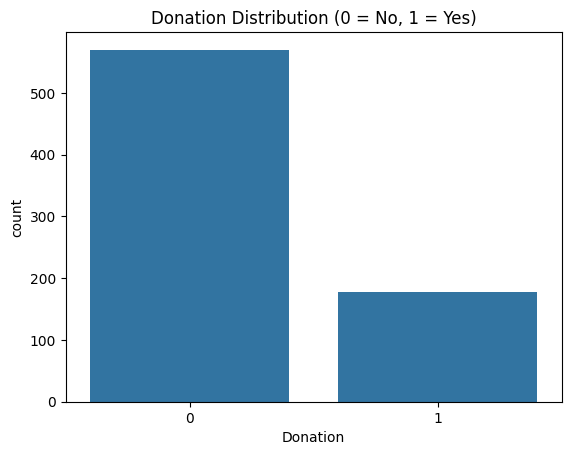

In [ ]:
sns.countplot(x='Donation', data=df)
plt.title("Donation Distribution (0 = No, 1 = Yes)")
plt.show()

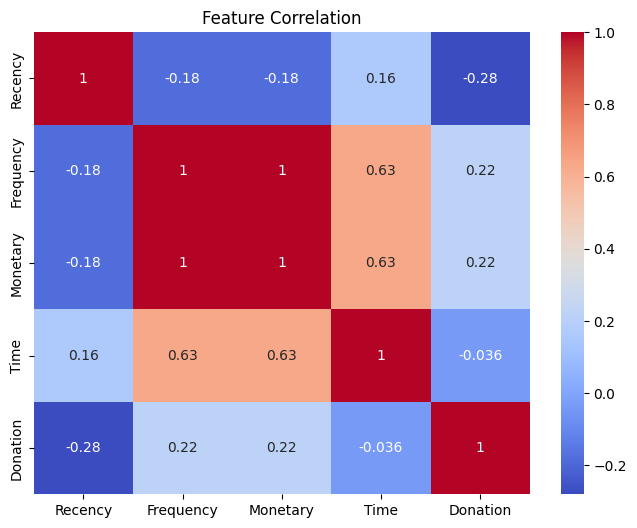

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
X = df.drop("Donation", axis=1)
y = df["Donation"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

Accuracy: 0.7333333333333333

Confusion Matrix:
[[101  12]
 [ 28   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       113
           1       0.43      0.24      0.31        37

    accuracy                           0.73       150
   macro avg       0.61      0.57      0.57       150
weighted avg       0.70      0.73      0.71       150



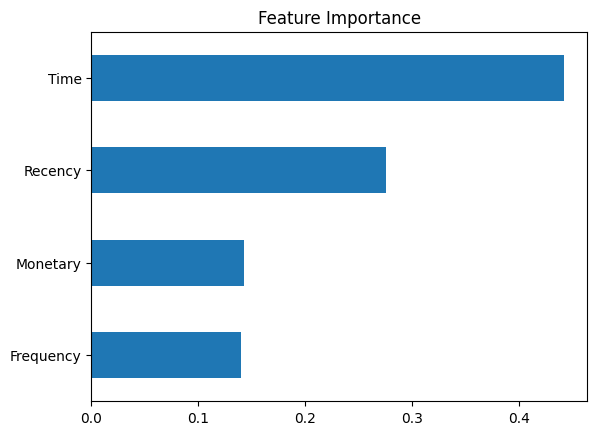

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

## Prediction

In [ ]:
new_donor = pd.DataFrame({
    "Recency": [1],
    "Frequency": [10],
    "Monetary": [3000],
    "Time": [30]
})
new_donor_scaled = scaler.transform(new_donor)
pred = rf_model.predict(new_donor_scaled)
print("Prediction (1 = Donate, 0 = Not Donate):", pred[0])

Prediction (1 = Donate, 0 = Not Donate): 1
